<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Heart Diease using machine Learning
Designing a model capable of predicting whether a person has or does not have heart disease based on their medical data.


##1.Problem Definition
>Given clinical parameters of the patient, predicting whether he or she does not have a heat disease?
##2. Data
>The data is available from Kaggle.com
##3. Evaluation
>If we can reach 95% accuracy at predicting whether not the patient has heart disease during the proof of concept, we'll pursue the project.
## 4. Features
>**Create data dictionary**

    1. age - age in years
    2. sex - (1 = male; 0 = female)
    3. cp - chest pain type
        * 0: Typical angina: chest pain related decrease blood supply to the heart
        * 1: Atypical angina: chest pain not related to heart
        * 2: Non-anginal pain: typically esophageal spasms (non heart related)
        * 3: Asymptomatic: chest pain not showing signs of disease
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    5. chol - serum cholestoral in mg/dl
        * serum = LDL + HDL + .2 * triglycerides
        * above 200 is cause for concern
    6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        * '>126' mg/dL signals diabetes
    7. restecg - resting electrocardiographic results
        * 0: Nothing to note
        * 1: ST-T Wave abnormality
            * can range from mild symptoms to severe problems
            * signals non-normal heart beat
        * 2: Possible or definite left ventricular hypertrophy
            * Enlarged heart's main pumping chamber
    8. thalach - maximum heart rate achieved
    9. exang - exercise induced angina (1 = yes; 0 = no)
    10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    11. slope - the slope of the peak exercise ST segment
        * 0: Upsloping: better heart rate with excercise (uncommon)
        * 1: Flatsloping: minimal change (typical healthy heart)
        * 2: Downslopins: signs of unhealthy heart
    12. ca - number of major vessels (0-3) colored by flourosopy
        * colored vessel means the doctor can see the blood passing through
        * the more blood movement the better (no clots)
    13. thal - thalium stress result
        * 1,3: normal
        * 6: fixed defect: used to be defect but ok now
        * 7: reversable defect: no proper blood movement when excercising
    14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [ ]:
#importing the tools(regular EDA and potting libraries)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##load data 
df = pd.read_csv("/content/drive/MyDrive/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

##Exploratory Data Analysis

In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df["slope"].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

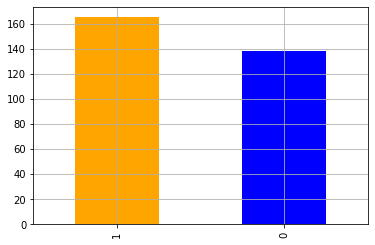

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["orange","blue"],grid=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#finding out the null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5715488ac8>,
      dtype=object)

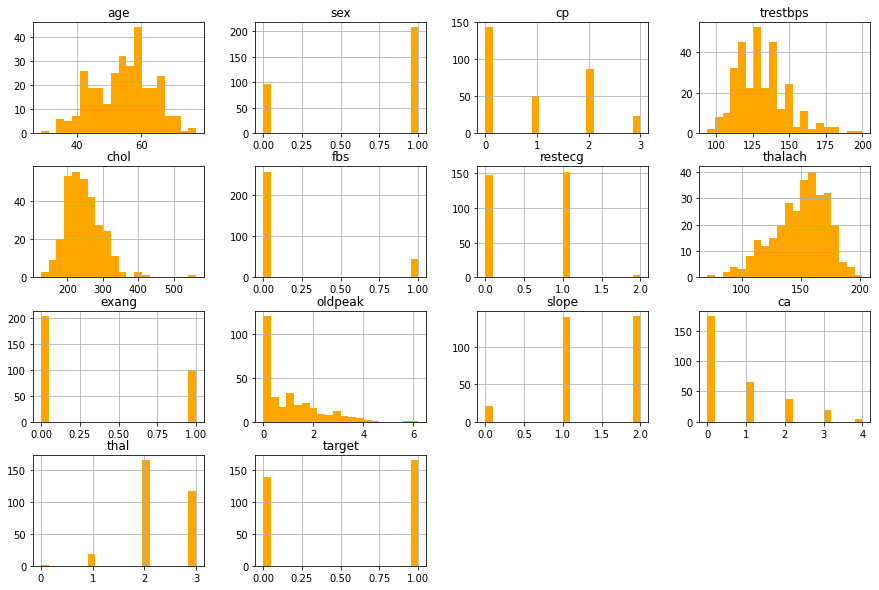

In [ ]:
df.hist(bins=20,figsize=(15,10), color="orange")


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


df.plot(kind="hist",x="sex",y="target",grid=True )
plt.xlabel("sex",color='white')
plt.ylabel("target", color="white")

In [ ]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
#compare target column with the "sex" column
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


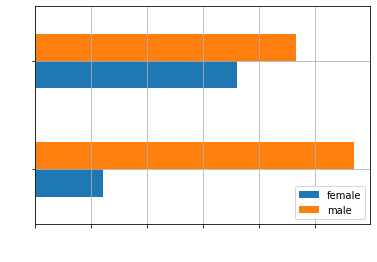

In [ ]:
pd.crosstab(df["target"],df["sex"]).plot(kind="barh",grid=True)
plt.xlabel("frequency",color='white')
plt.ylabel("0=no_disease  1=no_disease",color='white')
plt.yticks(rotation=0,color='white')
plt.xticks(color="white")
plt.legend(["female","male"])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(array([ 0., 20., 40., 60., 80.]), <a list of 5 Text major ticklabel objects>)

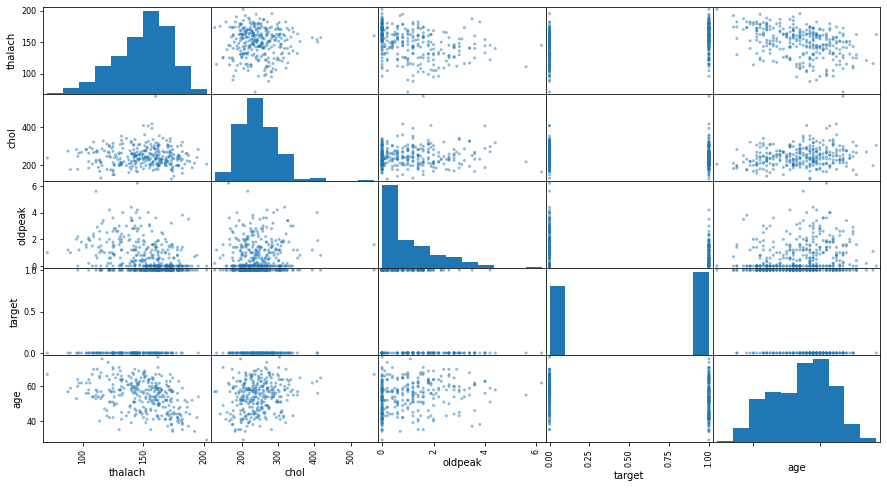

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["thalach","chol","oldpeak","target","age"]
scatter_matrix(df[attributes],figsize=(15,8),grid=True)
plt.xticks(color='white')
plt.yticks(color='white')

In [ ]:
df["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [ ]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

Text(0.5, 0, 'age')

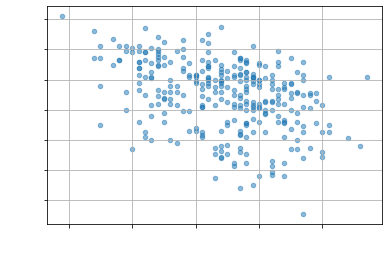

In [ ]:

df.plot(kind="scatter", y="thalach",x="age",grid=True,alpha=0.5)
plt.xticks(color='white')
plt.yticks(color='white')
plt.ylabel("thalach",color='white')
plt.xlabel("age",color="white")

(array([ 60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 9 Text major ticklabel objects>)

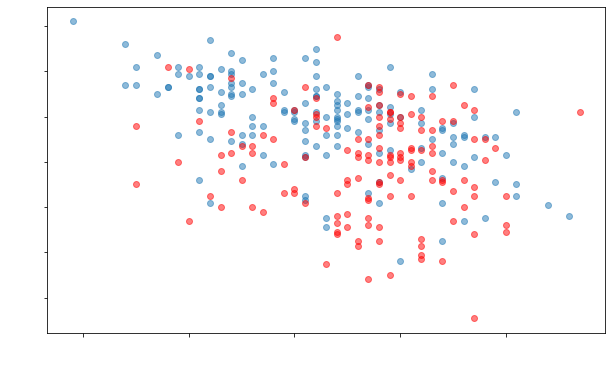

In [ ]:
plt.figure(figsize=(10,6)) 
#creating a scatter plot of age vs thalac just the posetive target values
plt.scatter(df["age"][df["target"]==1],
            df["thalach"][df["target"]==1],alpha=0.5)
# scatter plot with the negative examples
plt.scatter(df["age"][df["target"]==0],
            df["thalach"][df["target"]==0],color='red',alpha=0.5)
plt.xlabel("age",color='white')
plt.ylabel("thalach",color='white')
plt.xticks(color='white')
plt.yticks(color='white')


(array([ 60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 9 Text major ticklabel objects>)

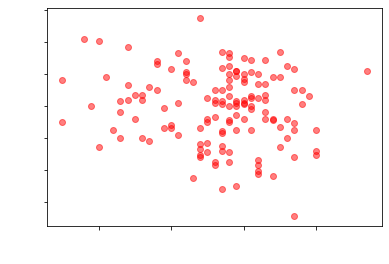

In [ ]:
# scatter plot with the negative examples
plt.scatter(df["age"][df["target"]==0],
            df["thalach"][df["target"]==0],color='red',alpha=0.5)
plt.xlabel("age",color='white')
plt.ylabel("thalach",color='white')
plt.xticks(color='white')
plt.yticks(color='white')

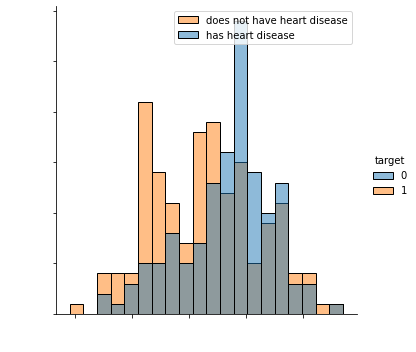

In [ ]:
sns.displot(df,x="age",bins=20,hue="target" )
plt.xlabel("age",color='white')
plt.ylabel("frequency",color='white',rotation=0)
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(["does not have heart disease","has heart disease"])

Text(10.049999999999997, 0.5, 'frequency')

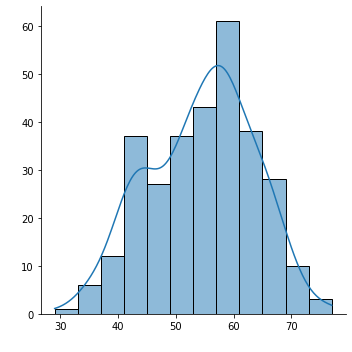

In [ ]:
sns.displot(df,x='age',kde=True)
plt.xlabel("age",color='white')
plt.ylabel("frequency",color='white')

In [ ]:
## heart disease frequency per chest pain type 
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


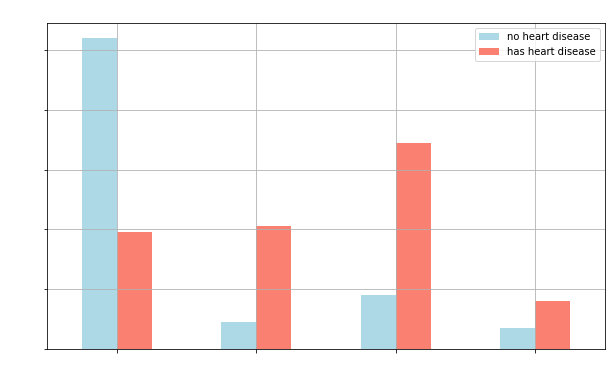

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=["lightblue","salmon"],grid=True)
plt.title("heart_disease frequency per chest pain type",color='white')
plt.xlabel("chest pain type",color='white')
plt.ylabel('frequency',color="white")
plt.xticks(rotation=0,color="white")
plt.yticks(color='white')
plt.legend(["no heart disease","has heart disease"])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#using a correlation matrix
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='YlGnBu').set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


In [ ]:
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text major ticklabel objects>)

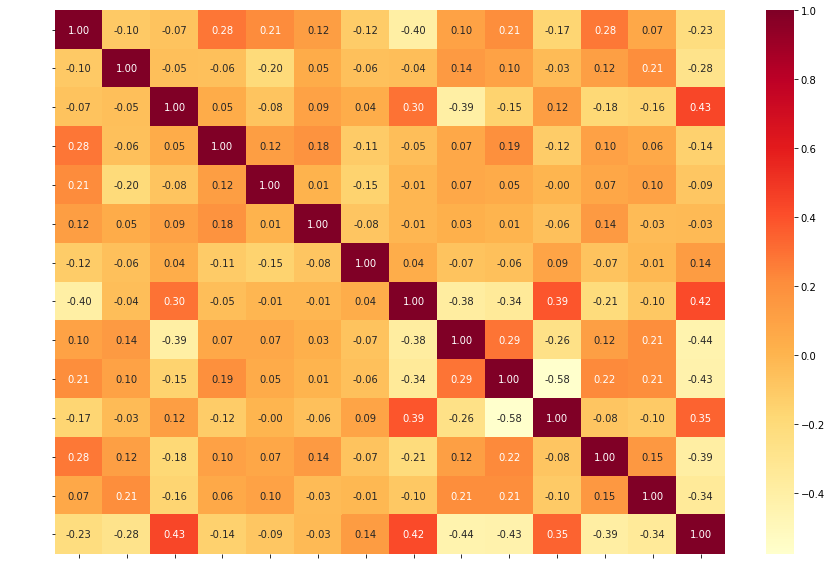

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="YlOrRd")
plt.xticks(color='white')
plt.yticks(color='white')

###Modelling

In [ ]:
# splitting the data into features and labels
X = df.drop("target",axis=1)
Y = df["target"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
#creating the training and the testing sets
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [ ]:
len(X_train)

242

Now we have got our data into the train and the testing data sets.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier()
rnd.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rnd.score(X_test,Y_test)

0.8524590163934426

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#put models in a dictionary 
models = {
   "LogisticRegression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier()
}
#creating function to fit and score the models
def fit_and_score(models, X_train,X_test,Y_train, Y_test) :
  #set the random seed
  np.random.seed(42)
  model_scores = {}
  # loop through models 
  for name, model in models.items():
    # fit the model to the data
    model.fit(X_train,Y_train)
    #evaluate the model and append the score to the model score 
    model_scores[name] = model.score(X_test,Y_test)
  return model_scores


In [ ]:
model_scores = fit_and_score(models, X_train, X_test,Y_train, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model_scores

{'KNN': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

In [ ]:
model_scores=pd.DataFrame(model_scores, index=["accuracy"])

In [ ]:
model_scores

,LogisticRegression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

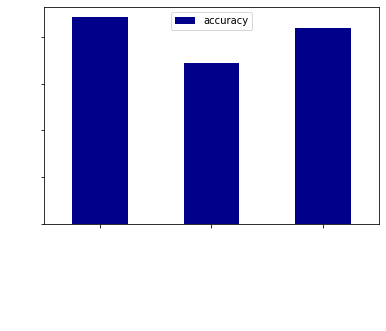

In [ ]:
model_scores.T.plot(kind="bar", color="Darkblue")
plt.ylabel("accuracy",color="white")
plt.yticks(color='white')
plt.xticks(color="white")

#Thus we have the baseline models
Lets look at the following:
* Hyper-parameter tuning
* Feature Importance
* Confusion matrix
* Cross validation
* Precision 
* Recall 
* F1 score
* Classification report
* ROC Curve
* Area Under Curve (AUC)


In [ ]:
from sklearn.metrics import confusion_matrix

##HyperParameter Tuning

In [ ]:
##Lets tun KNN
train_scores = []
test_scores = []
## create a list of diff values for N neighbours 
neighbors = range(1,21)
knn = KNeighborsClassifier()

# loop through the diff n_neighbours
for i in neighbors :
  knn.set_params(n_neighbors=i)
  #fit the algorithm 
  knn.fit(X_train,Y_train)

  #update the train_scores list 
  train_scores.append(knn.score(X_train,Y_train))

  #Update the test scores
  test_scores.append(knn.score(X_test,Y_test))

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [ ]:

train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

The highest obtained accuracy: 75.41%


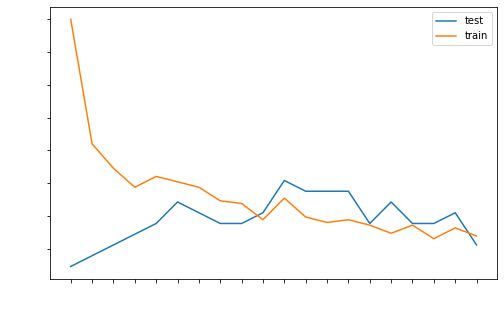

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(neighbors, test_scores)
plt.plot(neighbors, train_scores)
plt.xticks(np.arange(1,21,1),color='white')
plt.xlabel("no of neighbors",color='white')
plt.ylabel("score",color='white')
plt.yticks(color='white')
plt.legend(["test","train"])
print(f"The highest obtained accuracy: {max(test_scores)*100:.2f}%")

##Hyperparameter tuning with randomized search cv
we are going to tune :
* logistic regression 
* Random forest

In [ ]:
# create a hyperparamete grid for the logistic regression 
log_reg_grid = {
    "C" : np.logspace(-4,4,20),
    "solver" : ["liblinear"]
}

# create hyperparameter grid for random forest 
rf_grid = {
    "n_estimators" : np.arange(10,1000,50),
    "max_depth" : [None,3,5,10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2)
}